In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [175]:
housing = pd.read_csv('housing.csv')

In [176]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

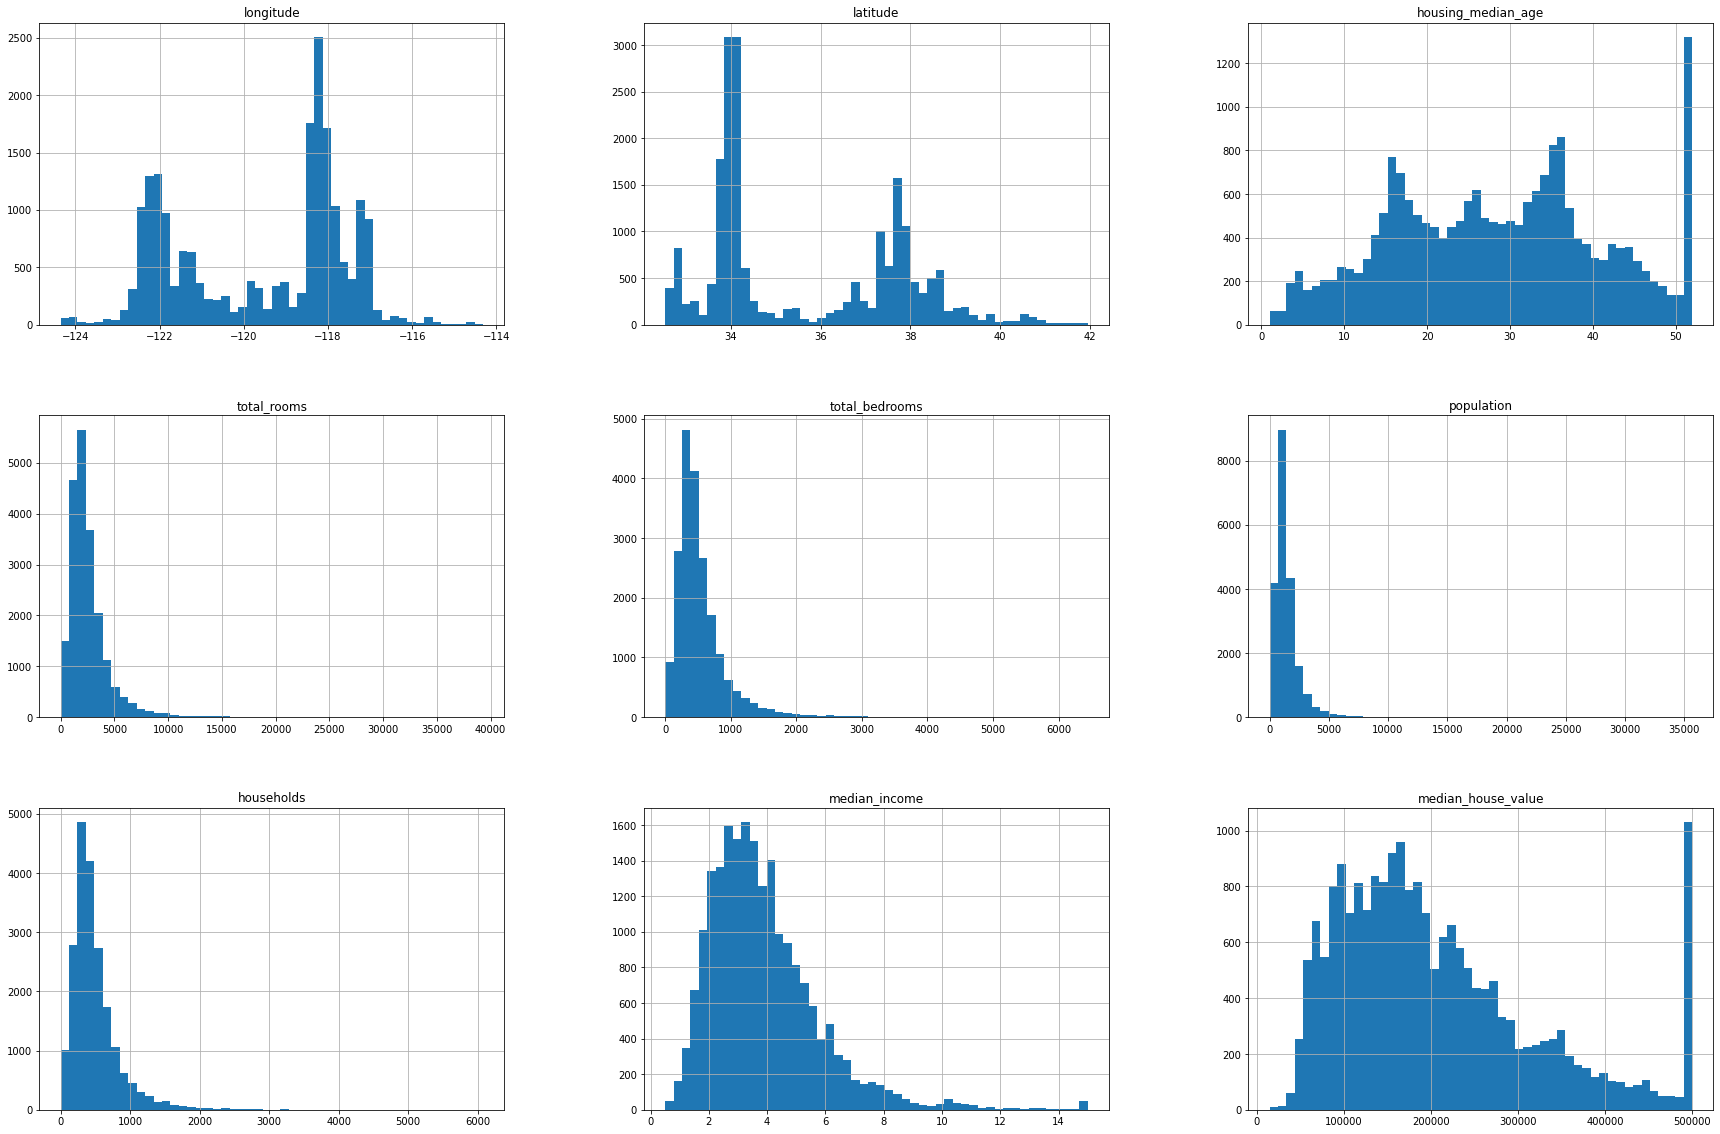

In [177]:
housing.hist(bins = 50, figsize = (30,20))

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
from sklearn.model_selection import train_test_split

**Creating a test set**

In [178]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [179]:
print(train_set.shape)
print(test_set.shape)

(16512, 10)
(4128, 10)


Creating an 'income_cat' variable for stratified sampling. We want equal distribution of median income across test and train datasets

<AxesSubplot:>

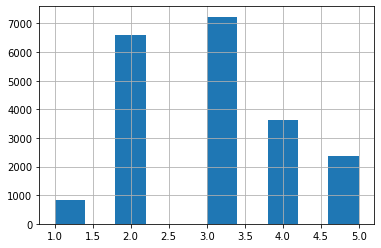

In [180]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1,2,3,4,5])
housing['income_cat'].hist()

Performing stratified sampling based on income category. We choose an important variable and use it for stratification to ensure that the distribution of that variable is maintained in training and test sets. Our variable chosen for stratification is the income_cat created from median_income variable.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [181]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [182]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [183]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [184]:
strat_train_set.drop('income_cat', axis = 1, inplace = True)
strat_test_set.drop('income_cat', axis = 1, inplace = True)

**Visualizations**

In [185]:
housing = strat_train_set.copy()

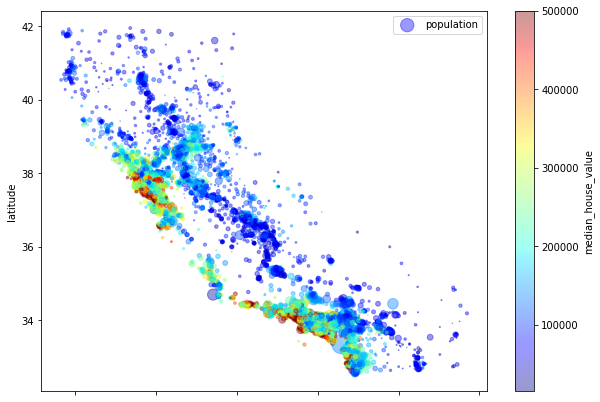

In [186]:
housing.plot(kind = 'scatter', x='longitude', y='latitude', alpha = 0.4, 
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()

In [187]:
corr_matrix = housing.corr()

In [188]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

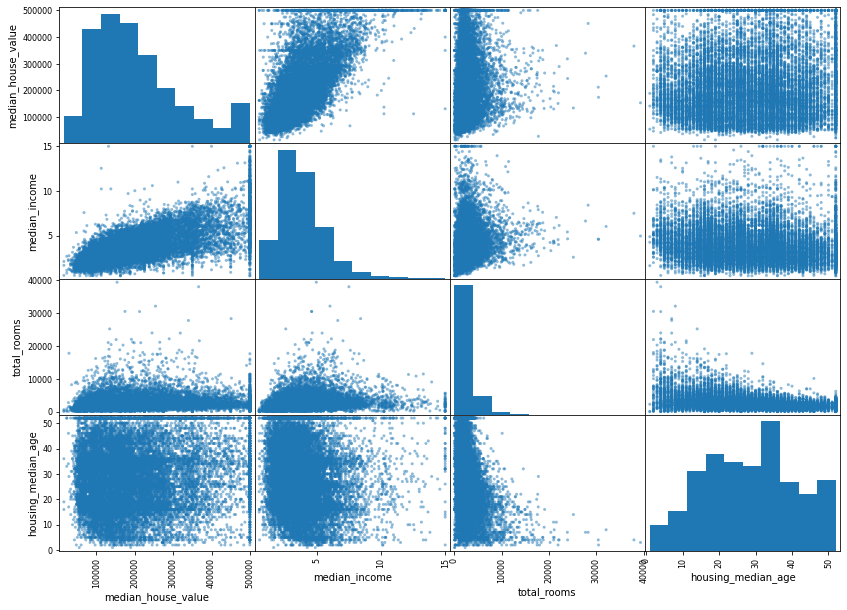

In [189]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (14,10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

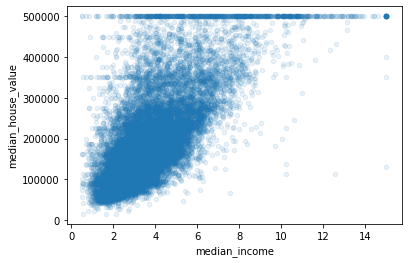

In [190]:
housing.plot(kind = 'scatter', x = 'median_income', y='median_house_value', alpha=0.1)

Creating additional features:

HANDLING MISSING VALUES 

In [192]:
train = strat_train_set.copy()
test = strat_test_set.copy()

In [195]:
test.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        49
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

In [196]:
train['total_bedrooms'].fillna(train['total_bedrooms'].median(), inplace = True)
test['total_bedrooms'].fillna(test['total_bedrooms'].median(), inplace = True)

In [198]:
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

test["rooms_per_household"] = test["total_rooms"]/test["households"]
test["bedrooms_per_room"] = test["total_bedrooms"]/test["total_rooms"]
test["population_per_household"]=test["population"]/test["households"]

In [200]:
# one hot encoding the categorical ocean_proximity variable
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [199]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            4128 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   median_house_value        4128 non-null   float64
 9   ocean_proximity           4128 non-null   object 
 10  rooms_per_household       4128 non-null   float64
 11  bedrooms_per_room         4128 non-null   float64
 12  population_per_household  4128 non-null   float64
dtypes: float64(12), object(1)
memory usage: 451.5+ KB


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [204]:
train = train.reset_index()
test = test.reset_index()

In [206]:
train.drop('index', axis=1, inplace=True)
test.drop('index', axis=1, inplace=True)

In [209]:
X_train_float = train.select_dtypes(include=['float64']).drop(columns=['median_house_value'])
X_test_float = test.select_dtypes(include=['float64']).drop(columns=['median_house_value'])

In [210]:
X_train_bin = train.select_dtypes(include = ['uint8'])
X_test_bin = test.select_dtypes(include = ['uint8'])

In [211]:
y_train = train['median_house_value']
y_test = test['median_house_value']

In [212]:
scaler = StandardScaler()

In [213]:
X_train_scaled = scaler.fit_transform(X_train_float)
X_test_scaled = scaler.transform(X_test_float)

In [214]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_float.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_float.columns)

In [216]:
X_train_scaled_df = pd.concat([X_train_scaled_df, train[X_train_bin.columns], y_train], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_df, test[X_test_bin.columns], y_test], axis=1)

**MODELLING**

In [220]:
X_train = X_train_scaled_df.drop('median_house_value',axis=1)
X_test = X_test_scaled_df.drop('median_house_value',axis=1)
y_train = train['median_house_value']
y_test = test['median_house_value']

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [239]:
tree = DecisionTreeRegressor()

In [240]:
tree.fit(X_train, y_train)
tree_pred_train = tree.predict(X_train)
tree_pred_test=tree.predict(X_test)

In [245]:
tree_mse = mean_squared_error(y_train, tree_pred_train)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

0.0

In [246]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [254]:
forest.fit(X_train, y_train)
forest_pred_train = forest.predict(X_train)
forest_pred_test = forest.predict(X_test)

In [256]:
forest_mse = mean_squared_error(y_train, forest_pred_train)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18663.81907969995

In [257]:
from sklearn.model_selection import GridSearchCV

In [258]:
param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [259]:
grid_search= GridSearchCV(forest, param_grid, cv=5,scoring = 'neg_mean_squared_error',
                         return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [264]:
model = grid_search.best_estimator_

In [269]:
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)
mse_tr = mean_squared_error(y_train, prediction_train)
mse_te = mean_squared_error(y_test, prediction_test)
rmse_tr = np.sqrt(mse_tr)
rmse_te= np.sqrt(mse_te)
print(rmse_tr)
print(rmse_te)

19157.03820628705
47408.36357981502
